In [22]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
import seaborn as sns
from soccerplots.radar_chart import Radar
from soccerplots.utils import add_image
import ipywidgets as widgets

In [2]:
data = pd.read_html('sportsref_download.xls',encoding="utf-8")
passes = pd.read_html('sportsref_download (1).xls',encoding="utf-8")

In [3]:
df = pd.DataFrame(data[0])

In [4]:
df = df.rename(columns={"Unnamed: 0_level_0":'Rk',"Unnamed: 1_level_0":'Player',"Unnamed: 2_level_0":'Nation',"Unnamed: 3_level_0":'Pos',"Unnamed: 4_level_0":'Squad',"Unnamed: 5_level_0":'Age',"Unnamed: 6_level_0":'Born'})

In [5]:
df = df.drop('Unnamed: 32_level_0',axis=1)

c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [6]:
per90_df = df[['Player','Pos','Squad','Playing Time','Per 90 Minutes']]

In [7]:
per90_df.columns = per90_df.columns.droplevel(level=0)

In [8]:
per90_df

,Player,Pos,Squad,MP,Starts,Min▼,90s,Gls,Ast,G+A,G-PK,G+A-PK,xG,xA,xG+xA,npxG,npxG+xA
0,Aaron Cresswell,DF,West Ham,24,24,2160,24.0,0.00,0.25,0.25,0.00,0.25,0.03,0.16,0.19,0.03,0.19
1,Karl Darlow,GK,Newcastle Utd,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Vicente Guaita,GK,Crystal Palace,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Harry Maguire,DF,Manchester Utd,24,24,2160,24.0,0.08,0.00,0.08,0.08,0.08,0.07,0.01,0.07,0.07,0.07
4,Rui Patrício,GK,Wolves,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Reda Khadra,FW,Brighton,1,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
495,Robert Snodgrass,"FW,DF",West Ham,3,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
496,Elliot Anderson,MF,Newcastle Utd,1,0,4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
497,Felipe Anderson,"FW,MF",West Ham,2,0,3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
per90_df.rename(columns={"Gls":"Gls/90","Ast":"Ast/90","G+A":"G+A/90","G-PK":"G-PK/90","G+A-PK":"G+A-PK/90","xG":"xG/90","xA":"xA/90","xG+xA":"xG+xA/90","npxG":"npxG/90","npxG+xA":"npxG+xA/90"},inplace=True)

c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:4298: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
per90_df

,Player,Pos,Squad,MP,Starts,Min▼,90s,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xA/90,xG+xA/90,npxG/90,npxG+xA/90
0,Aaron Cresswell,DF,West Ham,24,24,2160,24.0,0.00,0.25,0.25,0.00,0.25,0.03,0.16,0.19,0.03,0.19
1,Karl Darlow,GK,Newcastle Utd,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Vicente Guaita,GK,Crystal Palace,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Harry Maguire,DF,Manchester Utd,24,24,2160,24.0,0.08,0.00,0.08,0.08,0.08,0.07,0.01,0.07,0.07,0.07
4,Rui Patrício,GK,Wolves,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Reda Khadra,FW,Brighton,1,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
495,Robert Snodgrass,"FW,DF",West Ham,3,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
496,Elliot Anderson,MF,Newcastle Utd,1,0,4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
497,Felipe Anderson,"FW,MF",West Ham,2,0,3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
passes_df=pd.DataFrame(passes[0])

In [12]:
passes_df.columns = passes_df.columns.droplevel(0)

In [13]:
passes_df = passes_df.drop('Matches',axis=1)

In [14]:
passes_df = passes_df.drop(passes_df[passes_df.columns[2:8]],axis=1)

In [15]:
passes_df = passes_df.drop('Rk',axis=1)

In [16]:
per90_df

,Player,Pos,Squad,MP,Starts,Min▼,90s,Gls/90,Ast/90,G+A/90,G-PK/90,G+A-PK/90,xG/90,xA/90,xG+xA/90,npxG/90,npxG+xA/90
0,Aaron Cresswell,DF,West Ham,24,24,2160,24.0,0.00,0.25,0.25,0.00,0.25,0.03,0.16,0.19,0.03,0.19
1,Karl Darlow,GK,Newcastle Utd,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Vicente Guaita,GK,Crystal Palace,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Harry Maguire,DF,Manchester Utd,24,24,2160,24.0,0.08,0.00,0.08,0.08,0.08,0.07,0.01,0.07,0.07,0.07
4,Rui Patrício,GK,Wolves,24,24,2160,24.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Reda Khadra,FW,Brighton,1,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
495,Robert Snodgrass,"FW,DF",West Ham,3,0,5,0.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
496,Elliot Anderson,MF,Newcastle Utd,1,0,4,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
497,Felipe Anderson,"FW,MF",West Ham,2,0,3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [17]:
main_df = pd.merge(per90_df,passes_df,left_on='Player',right_on='Player')

In [18]:
main_df['Prog/90']=main_df['Prog']/(main_df['Min▼']/90)
main_df['KeyPasses/90']=main_df['KP']/(main_df['Min▼']/90)
main_df['PassesInPenaltyArea/90']=main_df['PPA']/(main_df['Min▼']/90)


In [19]:
main_df[main_df['Min▼']>300].sort_values('KeyPasses/90',ascending=False)

,Player,Pos,Squad,MP,Starts,Min▼,90s,Gls/90,Ast/90,G+A/90,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Prog/90,KeyPasses/90,PassesInPenaltyArea/90
36,Jack Grealish,"FW,MF",Aston Villa,22,22,1977,22.0,0.27,0.46,0.73,...,8.0,2.0,76,72,64,4,150,6.828528,3.459788,2.913505
143,Kevin De Bruyne,MF,Manchester City,17,16,1406,15.6,0.19,0.64,0.83,...,6.9,3.1,54,79,54,6,118,7.553343,3.456615,3.456615
52,Mason Mount,"MF,FW",Chelsea,23,21,1867,20.7,0.14,0.14,0.29,...,4.4,-1.4,63,104,34,5,118,5.688270,3.036958,1.638993
25,Bruno Fernandes,MF,Manchester Utd,24,23,2013,22.4,0.63,0.40,1.03,...,8.7,0.3,66,128,69,6,163,7.287630,2.950820,3.084948
178,Pascal Groß,MF,Brighton,20,13,1258,14.0,0.14,0.29,0.43,...,3.4,0.6,40,48,29,11,61,4.364070,2.861685,2.074722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,Kevin Long,DF,Burnley,7,6,547,6.1,0.00,0.00,0.00,...,0.0,0.0,0,8,1,0,13,2.138940,0.000000,0.164534
14,Sam Johnstone,GK,West Brom,23,23,2070,23.0,0.00,0.00,0.00,...,0.0,0.0,0,16,0,0,0,0.000000,0.000000,0.000000
216,Fabián Balbuena,DF,West Ham,12,12,1080,12.0,0.08,0.00,0.08,...,0.0,0.0,0,29,0,0,27,2.250000,0.000000,0.000000
326,Eric Bailly,DF,Manchester Utd,7,6,548,6.1,0.00,0.00,0.00,...,0.0,0.0,0,22,0,0,18,2.956204,0.000000,0.000000


In [20]:
categories = list(main_df.columns[7:17])
player1 = input('Select Player 1:')
player2 = input('Select Player 2: ')
if len(main_df[main_df['Player'].str.contains(player1)==True])>1:
    print(main_df[main_df['Player'].str.contains(player1)==True])
    player1 = input('Which one?:')
if len(main_df[main_df['Player'].str.contains(player2)==True])>1:
    print(main_df[main_df['Player'].str.contains(player2)==True])
    player1 = input('Which one?:')

Select Player 1:Cancelo
Select Player 2: Zinchenko


In [31]:
p1 = widgets.Dropdown(
        options=list(main_df['Player'].sort_values(ascending=True)),
        value=main_df['Player'][0],
        description='Player 1:',
        disabled=False,
    )

p2 = widgets.Dropdown(
        options=list(main_df['Player'].sort_values(ascending=True)),
        value=main_df['Player'][0],
        description='Player 2:',
        disabled=False,
    )


In [32]:
p1

Dropdown(description='Player 1:', index=1, options=('Aaron Connolly', 'Aaron Cresswell', 'Aaron Ramsdale', 'Aa…

In [33]:
p2

Dropdown(description='Player 2:', index=1, options=('Aaron Connolly', 'Aaron Cresswell', 'Aaron Ramsdale', 'Aa…

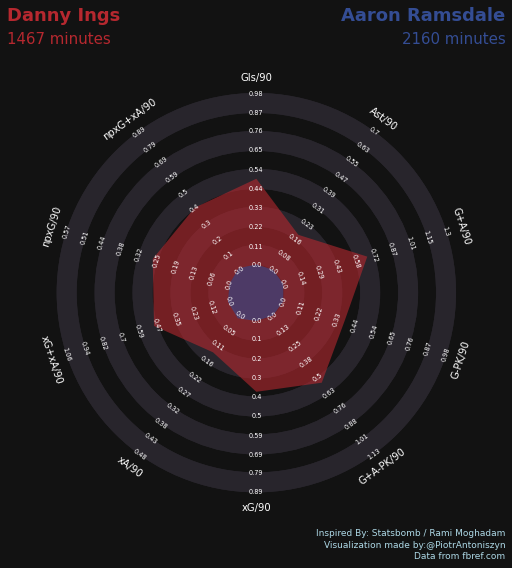

In [36]:

player1=p1.value
player2=p2.value

valuerange=[]

for x in categories:
    #main_df[x] = main_df[x].astype('float64',errors='ignore')
    valuerange.append((min(main_df[main_df['Min▼']>300][x]),max(main_df[main_df['Min▼']>300][x])*1.1))
    
       
## instantiate object
radar = Radar(background_color="#121212", patch_color="#28252C", label_color="#FFFFFF",
              range_color="#FFFFFF")


title = dict(
    title_name=str(main_df.iloc[main_df[main_df['Player'].str.contains(player1)==True].index[0]]['Player']).split('\\')[0],
    title_color='#B6282F',
    subtitle_name=str(main_df.iloc[main_df[main_df['Player'].str.contains(player1)==True].index[0]]['Min▼']) + ' minutes',
    subtitle_color='#B6282F',
    title_name_2=str(main_df.iloc[main_df[main_df['Player'].str.contains(player2)==True].index[0]]['Player']).split('\\')[0],
    title_color_2='#344D94',
    subtitle_name_2=str(main_df.iloc[main_df[main_df['Player'].str.contains(player2)==True].index[0]]['Min▼']) + ' minutes',
    subtitle_color_2='#344D94',
    title_fontsize=18,                ## fontsize for left-title
    subtitle_fontsize=15,             ## fontsize for left-subtitle
    title_fontsize_2=18,              ## fontsize for right-title
    subtitle_fontsize_2=15            ## fontsize for right-subtitle
)


## endnote 
endnote = "Visualization made by:@PiotrAntoniszyn\nData from fbref.com"
end_color = 'blue'
## plot radar
fig, ax = radar.plot_radar(ranges=valuerange, params=categories, values=[main_df.iloc[main_df[main_df['Player'].str.contains(player1)==True].index[0]][7:17],main_df.iloc[main_df[main_df['Player'].str.contains(player2)==True].index[0]][7:17]], 
                                 radar_color=['#B6282F', '#344D94'],title=title,compare=True,endnote=endnote,end_color = 'lightblue')

#fig = add_image(image="chelsea.png", fig=fig, left=0.464, bottom=0.81, width=0.1, height=0.075)